In [16]:
import yfinance as yf
from datetime import date
import pandas as pd 
from pandas.plotting import scatter_matrix

# Purpose

This notebook is where I am going to explore making my own transformers and pipelines

In [17]:
ticker = yf.Ticker('BTC')
df = ticker.history(start=date(2021, 5, 1), end=date(2021, 7, 1))
df.drop(columns=['Dividends', 'Stock Splits'], inplace=True)

In [18]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2021-05-03,98.910004,98.945000,98.910004,98.945000,2300
2021-05-04,98.959999,99.050003,98.959999,98.985001,2800
2021-05-05,99.000000,99.059998,98.994003,99.059998,3000
2021-05-06,99.099998,99.100998,99.030998,99.074997,4300
2021-05-07,99.150002,99.214996,99.148003,99.148003,1800
2021-05-10,99.199997,99.199997,99.070000,99.110001,3000


array([[<AxesSubplot:xlabel='Open', ylabel='Open'>,
        <AxesSubplot:xlabel='High', ylabel='Open'>,
        <AxesSubplot:xlabel='Low', ylabel='Open'>,
        <AxesSubplot:xlabel='Close', ylabel='Open'>,
        <AxesSubplot:xlabel='Volume', ylabel='Open'>],
       [<AxesSubplot:xlabel='Open', ylabel='High'>,
        <AxesSubplot:xlabel='High', ylabel='High'>,
        <AxesSubplot:xlabel='Low', ylabel='High'>,
        <AxesSubplot:xlabel='Close', ylabel='High'>,
        <AxesSubplot:xlabel='Volume', ylabel='High'>],
       [<AxesSubplot:xlabel='Open', ylabel='Low'>,
        <AxesSubplot:xlabel='High', ylabel='Low'>,
        <AxesSubplot:xlabel='Low', ylabel='Low'>,
        <AxesSubplot:xlabel='Close', ylabel='Low'>,
        <AxesSubplot:xlabel='Volume', ylabel='Low'>],
       [<AxesSubplot:xlabel='Open', ylabel='Close'>,
        <AxesSubplot:xlabel='High', ylabel='Close'>,
        <AxesSubplot:xlabel='Low', ylabel='Close'>,
        <AxesSubplot:xlabel='Close', ylabel='Close'>,
    

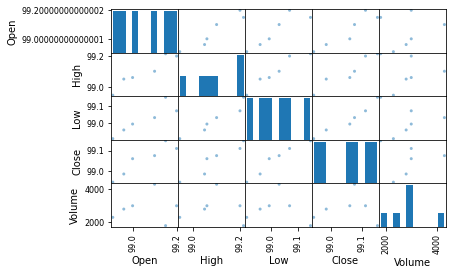

In [19]:
scatter_matrix(df)

In [20]:
df.corr()

,Open,High,Low,Close,Volume
Open,1.000000,0.949656,0.895285,0.919465,0.132329
High,0.949656,1.000000,0.958306,0.946466,-0.051730
Low,0.895285,0.958306,1.000000,0.967504,-0.144531
Close,0.919465,0.946466,0.967504,1.000000,0.013870
Volume,0.132329,-0.051730,-0.144531,0.013870,1.000000


In [21]:
# Transformer to take the percent change between Close and Open
#This is close-open/open
from sklearn.base import BaseEstimator, TransformerMixin

class PercentChangeEstimator(BaseEstimator, TransformerMixin):
    def __init__(self, earlier_column_name='', later_column_name=''):
        self.earlier_column_name = earlier_column_name
        self.later_column_name = later_column_name

    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X[f'Pct_Change_{self.earlier_column_name}_to_{self.later_column_name}'] = 100*(X[self.later_column_name]-X[self.earlier_column_name])/X[self.earlier_column_name]
        return X


# pce = PercentChangeEstimator(earlier_column_name='Open', later_column_name='Close')
# print(pce)
# df['Percent_Change'] = pce.transform(df)
df.head()



,Open,High,Low,Close,Volume
Date,,,,,
2021-05-03,98.910004,98.945000,98.910004,98.945000,2300
2021-05-04,98.959999,99.050003,98.959999,98.985001,2800
2021-05-05,99.000000,99.059998,98.994003,99.059998,3000
2021-05-06,99.099998,99.100998,99.030998,99.074997,4300
2021-05-07,99.150002,99.214996,99.148003,99.148003,1800


In [22]:
# Now seeing if it works in a pipeline
from sklearn.pipeline import Pipeline
pipeline = Pipeline([('pct_change', PercentChangeEstimator(earlier_column_name='Open', later_column_name='Close'))])
df = pipeline.fit_transform(df)
df.head()

,Open,High,Low,Close,Volume,Pct_Change_Open_toClose
Date,,,,,,
2021-05-03,98.910004,98.945000,98.910004,98.945000,2300,0.035382
2021-05-04,98.959999,99.050003,98.959999,98.985001,2800,0.025264
2021-05-05,99.000000,99.059998,98.994003,99.059998,3000,0.060604
2021-05-06,99.099998,99.100998,99.030998,99.074997,4300,-0.025229
2021-05-07,99.150002,99.214996,99.148003,99.148003,1800,-0.002016
